# 机器学习练习 7 - K-means 和PCA（主成分分析）

## K-means 聚类

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat


In [2]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

测试函数。

In [66]:
data = loadmat('data/ex7data2.mat')
X = data['X']
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

array([ 0.,  2.,  1.])

计算簇的聚类中心。 聚类中心只是当前分配给簇的所有样本的平均值。

In [67]:
data2 = pd.DataFrame(data.get('X'), columns=['X1', 'X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


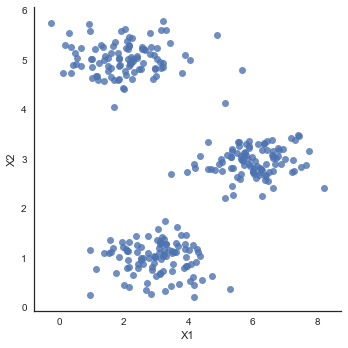

In [68]:
sb.set(context="notebook", style="white")
sb.lmplot('X1', 'X2', data=data2, fit_reg=False)
plt.show()

In [4]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [5]:
compute_centroids(X, idx, 3)

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [6]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [7]:
idx, centroids = run_k_means(X, initial_centroids, 10)

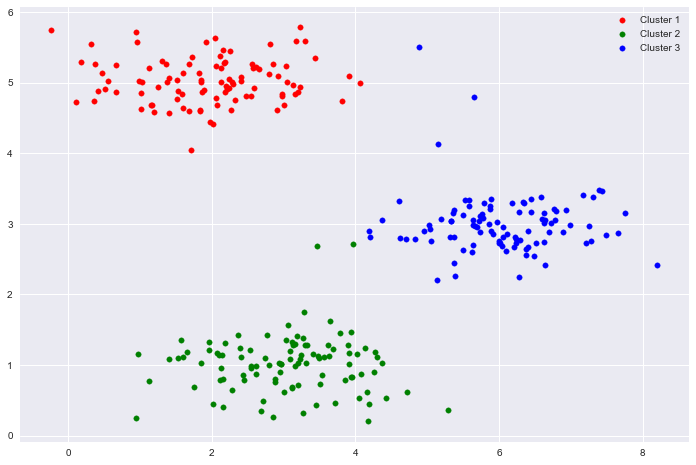

In [8]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

In [9]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [10]:
init_centroids(X, 3)

array([[ 6.03762833,  2.68303512],
       [ 1.96547974,  1.2173076 ],
       [ 3.16109021,  1.29422893]])


下面是要压缩的图像。

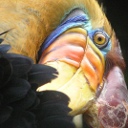

In [11]:
from IPython.display import Image
Image(filename='data/bird_small.png')

The raw pixel data has been pre-loaded for us so let's pull it in.

In [12]:
image_data = loadmat('data/bird_small.mat')
image_data

{'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ..., 
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ..., 
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ..., 
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ..., 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ..., 
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ..., 
         [ 80,  38,  40],
         [ 68,  39,  40],
         [ 59,  43,  42]],
 
        [[ 15,  19,  19],
         [ 20,  20,  18],
         [ 18,  19,  17],
         ..., 
         [ 65,  43

In [13]:
A = image_data['A']
A.shape

(128, 128, 3)

预处理，并将其提供给K-means算法。

In [14]:
# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [15]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

In [16]:
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

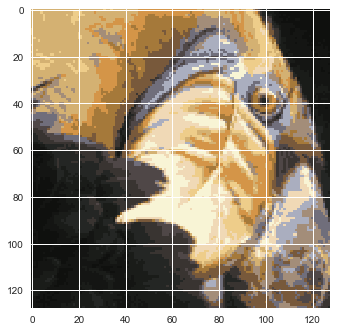

In [17]:
plt.imshow(X_recovered)
plt.show()

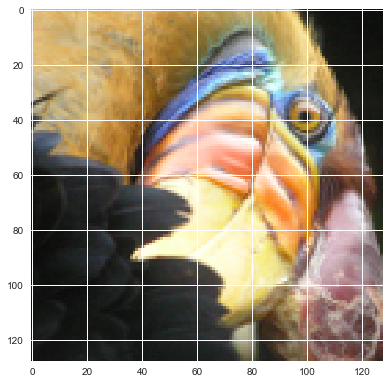

In [50]:
from skimage import io

# cast to float, you need to do this otherwise the color would be weird after clustring
pic = io.imread('data/bird_small.png') / 255.
io.imshow(pic)
plt.show()

In [51]:
pic.shape

(128, 128, 3)

In [52]:
# serialize data
data = pic.reshape(128*128, 3)

In [54]:
data.shape

(16384, 3)

In [61]:
from sklearn.cluster import KMeans#导入kmeans库

model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [56]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [58]:
centroids[C].shape

(16384, 3)

In [59]:
compressed_pic = centroids[C].reshape((128,128,3))

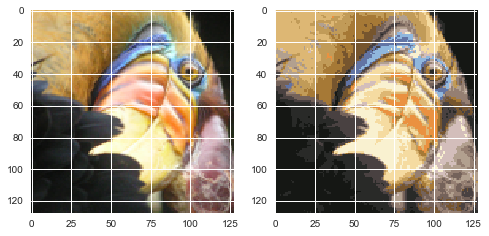

In [60]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()

## Principal component analysis（主成分分析）

In [18]:
data = loadmat('data/ex7data1.mat')
data

{'X': array([[ 3.38156267,  3.38911268],
        [ 4.52787538,  5.8541781 ],
        [ 2.65568187,  4.41199472],
        [ 2.76523467,  3.71541365],
        [ 2.84656011,  4.17550645],
        [ 3.89067196,  6.48838087],
        [ 3.47580524,  3.63284876],
        [ 5.91129845,  6.68076853],
        [ 3.92889397,  5.09844661],
        [ 4.56183537,  5.62329929],
        [ 4.57407171,  5.39765069],
        [ 4.37173356,  5.46116549],
        [ 4.19169388,  4.95469359],
        [ 5.24408518,  4.66148767],
        [ 2.8358402 ,  3.76801716],
        [ 5.63526969,  6.31211438],
        [ 4.68632968,  5.6652411 ],
        [ 2.85051337,  4.62645627],
        [ 5.1101573 ,  7.36319662],
        [ 5.18256377,  4.64650909],
        [ 5.70732809,  6.68103995],
        [ 3.57968458,  4.80278074],
        [ 5.63937773,  6.12043594],
        [ 4.26346851,  4.68942896],
        [ 2.53651693,  3.88449078],
        [ 3.22382902,  4.94255585],
        [ 4.92948801,  5.95501971],
        [ 5.79295774,  

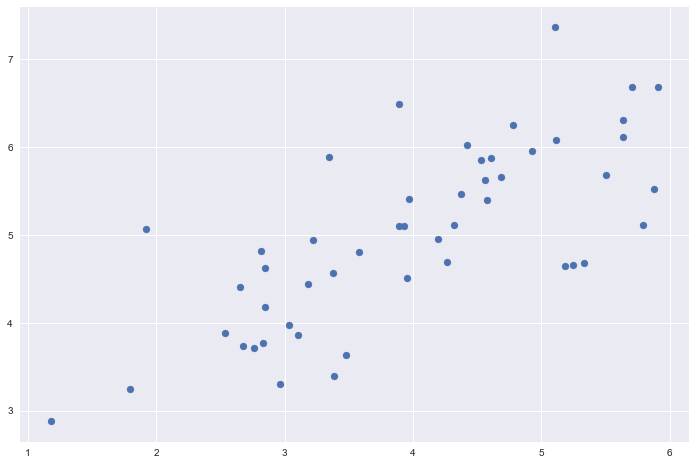

In [19]:
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])
plt.show()

PCA的算法相当简单。 在确保数据被归一化之后，输出仅仅是原始数据的协方差矩阵的奇异值分解。

In [37]:
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

In [38]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.01640988, -0.04222849, -0.0421747 , ...,  0.00078787,
           0.00059301,  0.00069988],
         [-0.01692408, -0.04109658, -0.04413594, ..., -0.0014743 ,
          -0.00159743, -0.00183183],
         [-0.01714767, -0.03963341, -0.04577663, ...,  0.00796443,
           0.00053733,  0.00152458],
         ..., 
         [-0.0085838 , -0.05826306,  0.04851035, ..., -0.00294466,
           0.00394326,  0.00497121],
         [-0.00680308, -0.06081527,  0.04664601, ...,  0.00038729,
          -0.00186067, -0.00185365],
         [-0.005765  , -0.06173977,  0.04483153, ...,  0.00228049,
           0.00058499,  0.00071138]]),
 array([  2.62189504e+02,   1.86275072e+02,   1.17780320e+02, ...,
          1.76409446e-04,   1.66475262e-04,   1.60785895e-04]),
 matrix([[-0.01640988, -0.01692408, -0.01714767, ..., -0.0085838 ,
          -0.00680308, -0.005765  ],
         [-0.04222849, -0.04109658, -0.03963341, ..., -0.05826306,
          -0.06081527, -0.06173977],
         [-0.0421747

实现一个计算投影并且仅选择顶部K个分量的函数，有效地减少了维数。

In [39]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

In [40]:
Z = project_data(X, U, 1)
Z

matrix([[  526.09608833],
        [  304.5906028 ],
        [ -389.99893833],
        ..., 
        [  487.55926046],
        [ 1358.99575656],
        [  372.01599145]])

In [41]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [42]:
X_recovered = recover_data(Z, U, 1)
X_recovered

matrix([[ -8.6331713 ,  -8.903694  ,  -9.02132266, ...,  -4.51590133,
          -3.57907304,  -3.0329432 ],
        [ -4.99829386,  -5.15491672,  -5.22301946, ...,  -2.6145435 ,
          -2.07215381,  -1.75596439],
        [  6.39983401,   6.6003745 ,   6.6875735 , ...,   3.3476712 ,
           2.65319343,   2.24834333],
        ..., 
        [ -8.00078675,  -8.25149351,  -8.36050581, ...,  -4.18510907,
          -3.31690397,  -2.81077844],
        [-22.30095114, -22.99975732, -23.30361218, ..., -11.66534191,
          -9.24535495,  -7.83460861],
        [ -6.10473609,  -6.29602961,  -6.37920784, ...,  -3.19330926,
          -2.53085403,  -2.14467166]])

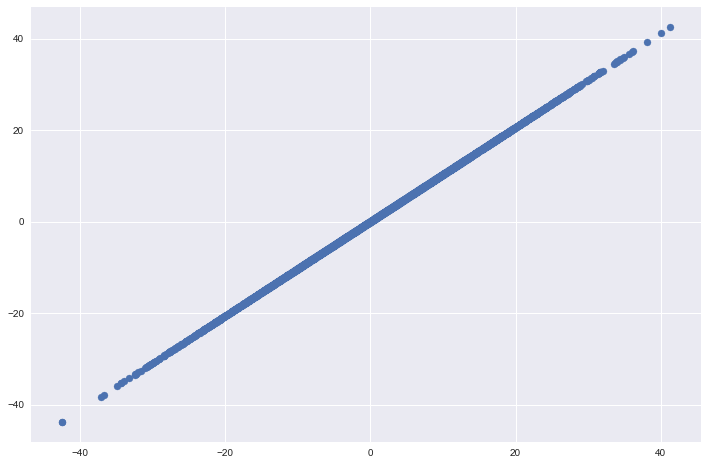

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(list(X_recovered[:, 0]), list(X_recovered[:, 1]))
plt.show()

In [44]:
faces = loadmat('data/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [69]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


练习代码包括一个将渲染数据集中的前100张脸的函数。 而不是尝试在这里重新生成，您可以在练习文本中查看他们的样子。 我们至少可以很容易地渲染一个图像。

In [45]:
face = np.reshape(X[3,:], (32, 32))

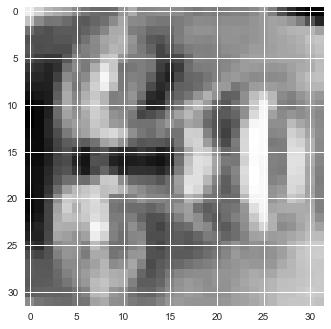

In [46]:
plt.imshow(face)
plt.show()

In [48]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

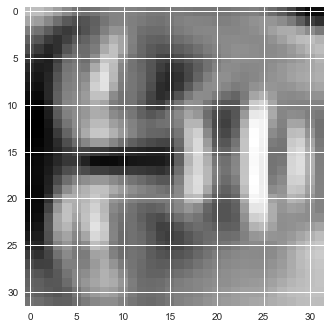

In [49]:
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)
plt.show()